# Parkinson's Disease(PD) Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Load the data set

In [2]:
PD_df = pd.read_csv("parkinsons.data")

In [3]:
PD_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

In [4]:
PD_df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
PD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

From discription provided in "parkinsons.names" file and form PD_df.info() we can find the all features as numerical column except "status".

**status** : is the target variable.

***name*** : is the identity of the individual and that can be dropped from dataframe.

In [6]:
#Drop "name" column
PD_df = PD_df.drop(["name"], axis=1)

In [7]:
#Shape
PD_df.shape

(195, 23)

In [8]:
PD_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
#Check for missing value
PD_df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
#Check for missing value
PD_df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## No missing vlaue present in dataset.

# 3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [11]:
# Basic statistic(mean, median, std. etc.) of all features.
PD_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240E1316550>,
      dtype=object)

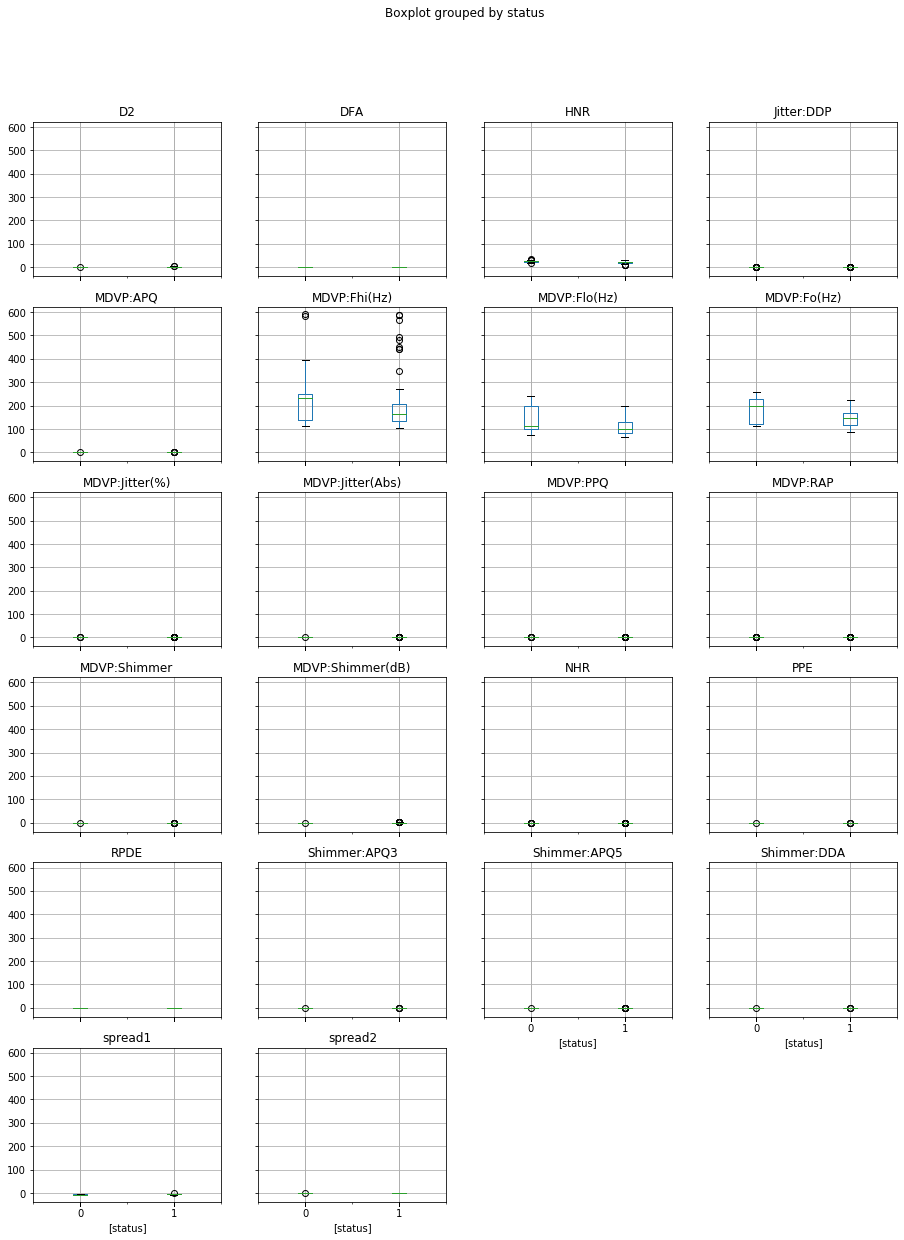

In [12]:
PD_df.boxplot(by="status",layout=(6,4), figsize=(15,20))

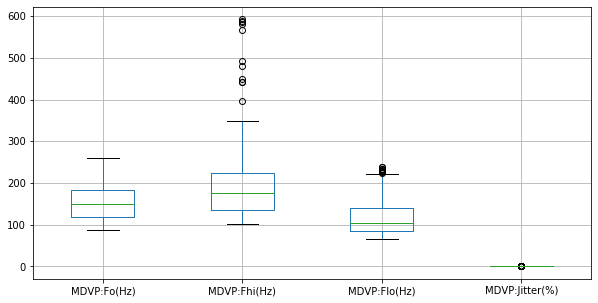

In [13]:
PD_df.boxplot(column=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)'],figsize=(10,5))

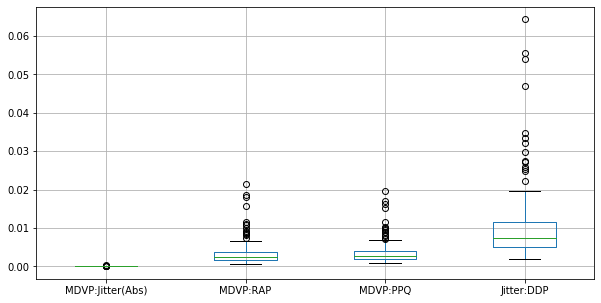

In [14]:
PD_df.boxplot(column=['MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP'],figsize=(10,5))

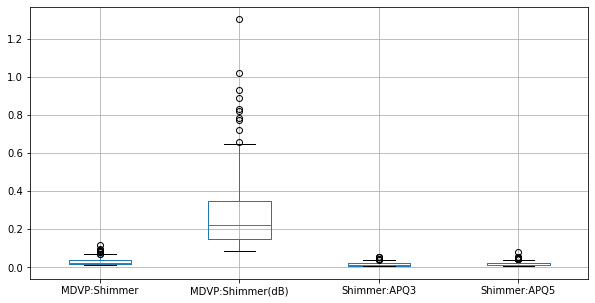

In [15]:
PD_df.boxplot(column=['MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5'],figsize=(10,5))

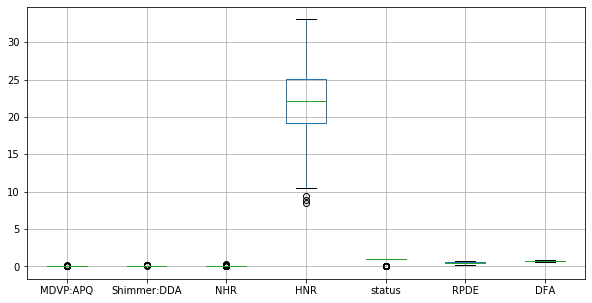

In [16]:
PD_df.boxplot(column=['MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA'],figsize=(10,5))

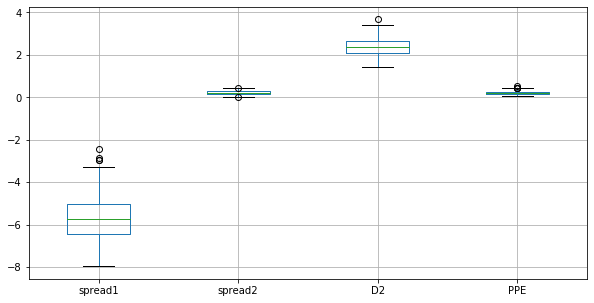

In [17]:
PD_df.boxplot(column=['spread1', 'spread2', 'D2', 'PPE'],figsize=(10,5))

### Above I have plotted two boxplot 1st one is plotted by grouping by status and 2nd boxplot is plotted for all features. From both boxplot it can seen that some outlier is present in 'MDVP:Fhi(Hz)' and Jitter:DDP' column.

## For further verification I have also plotted histogram below.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240E6D71BE0>,
      dtype=object)

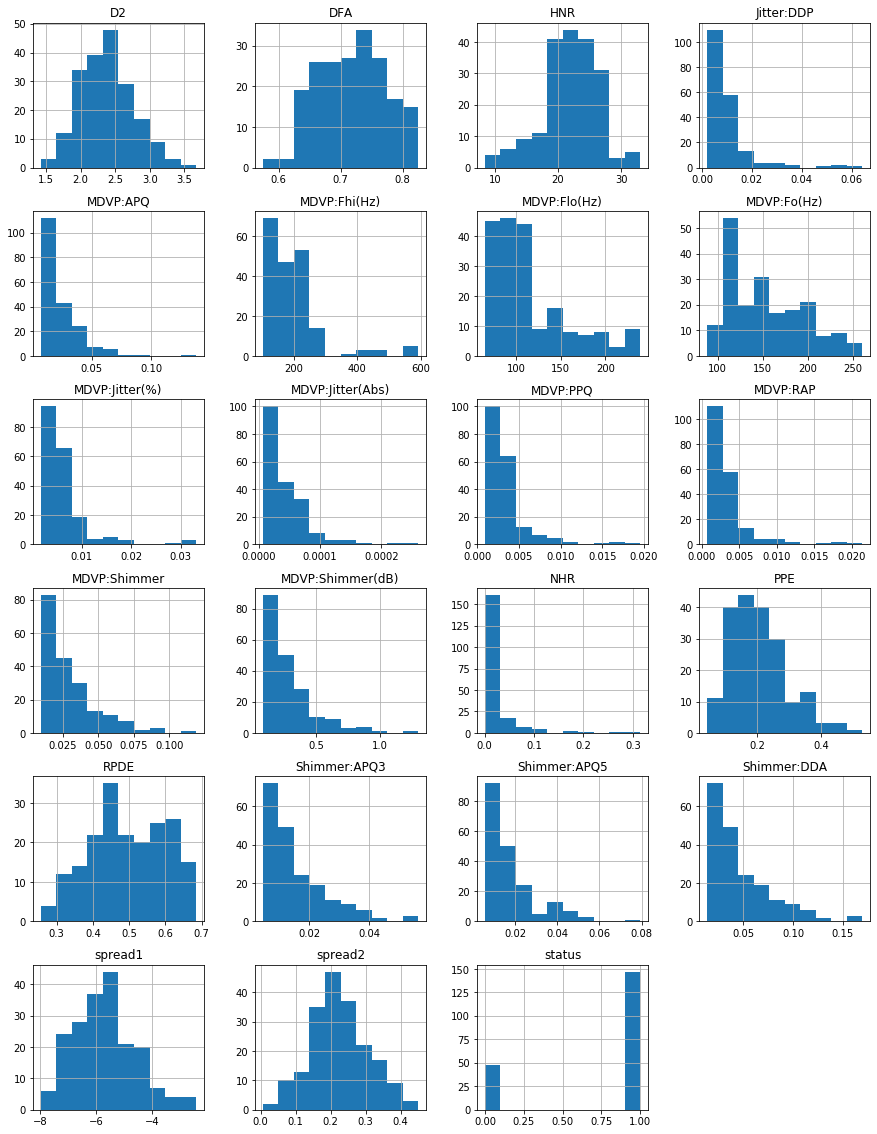

In [18]:
PD_df.hist(layout=(6,4), figsize=(15,20))

In [19]:
PD_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

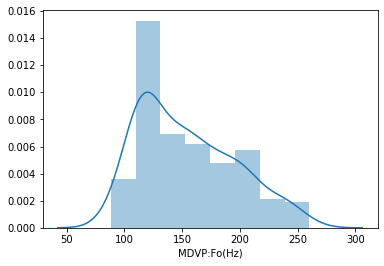

In [20]:
sns.distplot(PD_df['MDVP:Fo(Hz)'],kde=True)

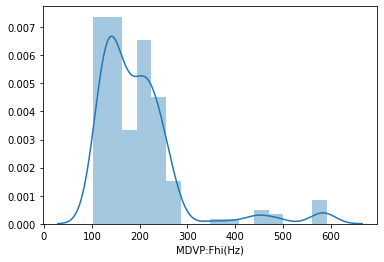

In [21]:
sns.distplot(PD_df['MDVP:Fhi(Hz)'],kde=True)

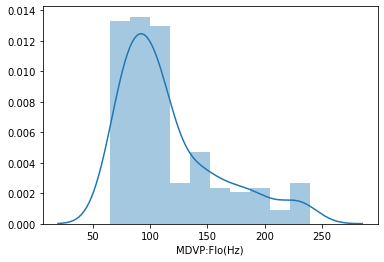

In [22]:
sns.distplot(PD_df['MDVP:Flo(Hz)'],kde=True)

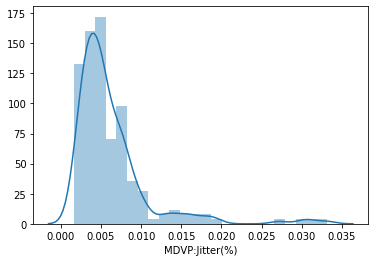

In [23]:
sns.distplot(PD_df['MDVP:Jitter(%)'],kde=True)

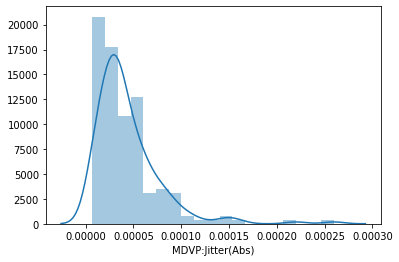

In [24]:
sns.distplot(PD_df['MDVP:Jitter(Abs)'],kde=True)

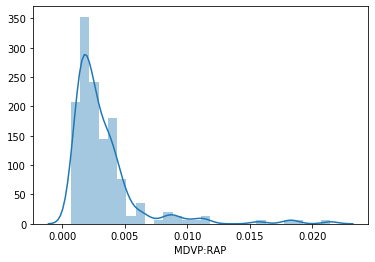

In [25]:
sns.distplot(PD_df['MDVP:RAP'],kde=True)

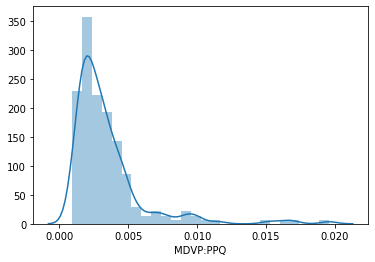

In [26]:
sns.distplot(PD_df['MDVP:PPQ'],kde=True)

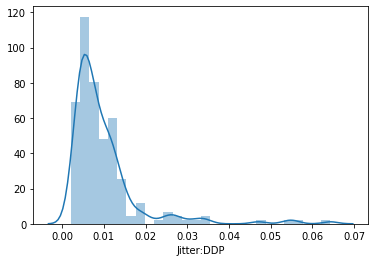

In [27]:
sns.distplot(PD_df['Jitter:DDP'],kde=True)

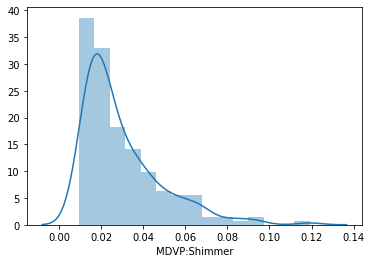

In [28]:
sns.distplot(PD_df['MDVP:Shimmer'],kde=True)

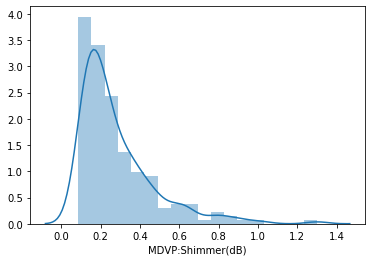

In [29]:
sns.distplot(PD_df['MDVP:Shimmer(dB)'],kde=True)

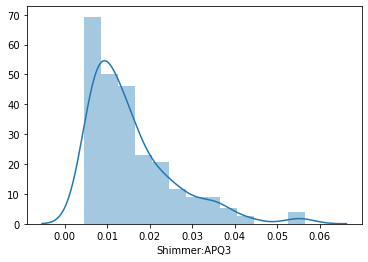

In [30]:
sns.distplot(PD_df['Shimmer:APQ3'],kde=True)

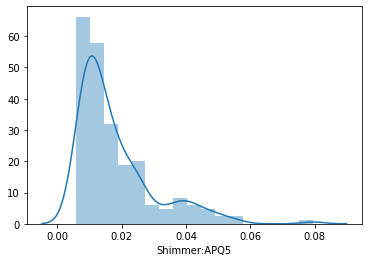

In [31]:
sns.distplot(PD_df['Shimmer:APQ5'],kde=True)

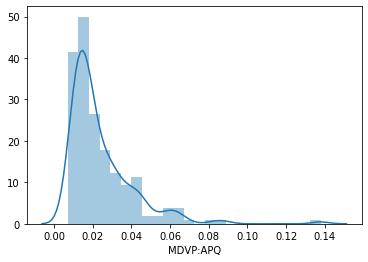

In [32]:
sns.distplot(PD_df['MDVP:APQ'],kde=True)

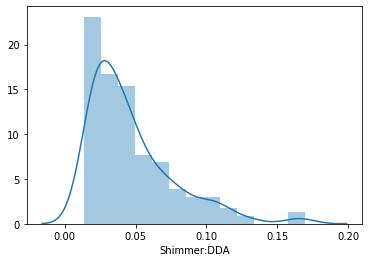

In [33]:
sns.distplot(PD_df['Shimmer:DDA'],kde=True)

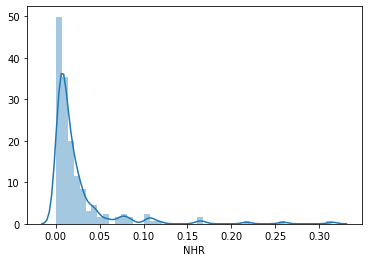

In [34]:
sns.distplot(PD_df['NHR'],kde=True)

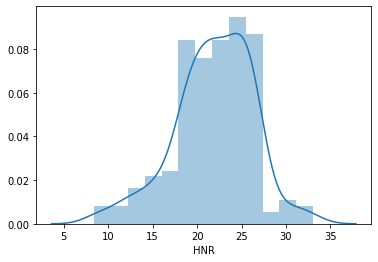

In [35]:
sns.distplot(PD_df['HNR'],kde=True)

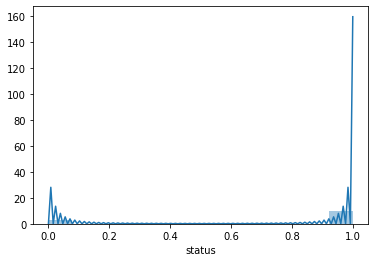

In [36]:
sns.distplot(PD_df['status'],kde=True)

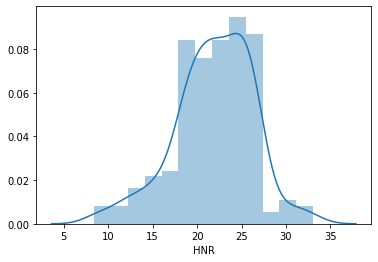

In [37]:
sns.distplot(PD_df['HNR'],kde=True)

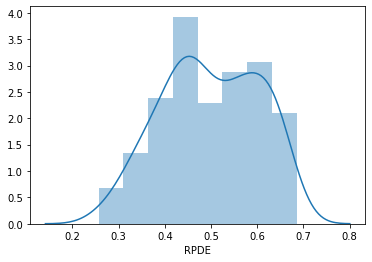

In [38]:
sns.distplot(PD_df['RPDE'],kde=True)

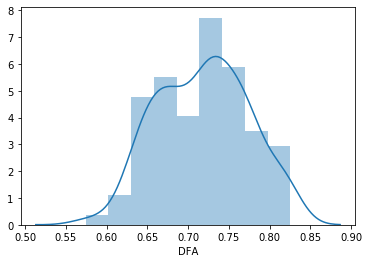

In [39]:
sns.distplot(PD_df['DFA'],kde=True)

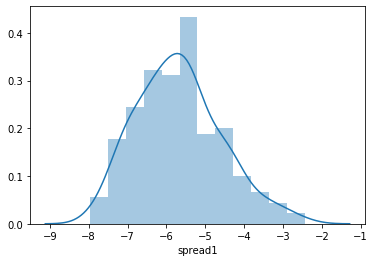

In [40]:
sns.distplot(PD_df['spread1'],kde=True)

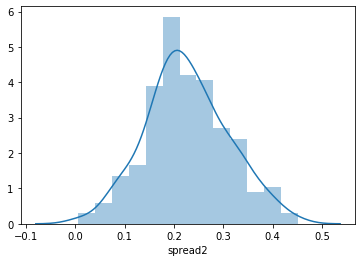

In [41]:
sns.distplot(PD_df['spread2'],kde=True)

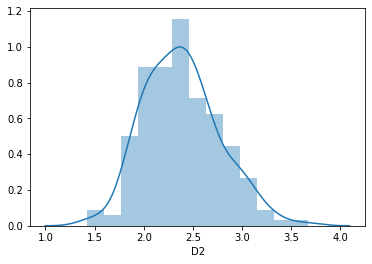

In [42]:
sns.distplot(PD_df['D2'],kde=True)

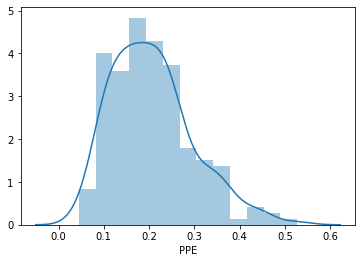

In [43]:
sns.distplot(PD_df['PPE'],kde=True)

In [44]:
PD_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [45]:
corr = PD_df.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


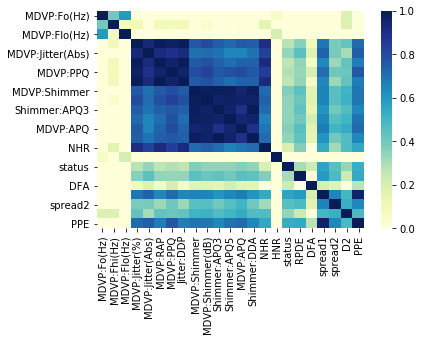

In [81]:
#sns.heatmap(corr,vmin=0, vmax=1,cmap='YlGnBu', annot=True)
sns.heatmap(corr,vmin=0, vmax=1,cmap='YlGnBu')

In [47]:
#sns.pairplot(PD_df,diag_kind="kde")

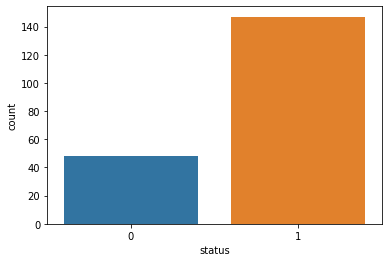

In [48]:
# Distribution of target variable
sns.countplot(PD_df["status"])

In [49]:
PD_df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

## From distribution of target variable we can see that data is imbalanced.

# 4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = PD_df.drop(["status"], axis=1)
Y = PD_df["status"]

In [52]:
X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [53]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [54]:
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30, random_state=42)

# 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [56]:
dTree_classifier = DecisionTreeClassifier(criterion='entropy')
dTree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
dTree_classifier.score(x_train,y_train)

1.0

# 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

In [58]:
# Prediction
y_pred = dTree_classifier.predict(x_test)

In [59]:
print("Predicited Value:")
y_pred

Predicited Value:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

### Classification Report on Test data

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



In [62]:
from sklearn.metrics import accuracy_score

In [71]:
print("Accuracy Score {}".format(accuracy_score(y_test, y_pred)))

Accuracy Score 0.8983050847457628


In [72]:
from sklearn.metrics import confusion_matrix

In [74]:
print("Confusion Matrix:")
confusion_matrix(y_test,y_pred)

Confusion Matrix:


array([[11,  4],
       [ 2, 42]], dtype=int64)

# 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

In [67]:
dTree_classifier_reg = DecisionTreeClassifier(criterion='entropy',max_depth=15, min_samples_leaf=5,min_samples_split=5)
dTree_classifier_reg.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
# Prediction
y_pred_reg = dTree_classifier_reg.predict(x_test)
print(classification_report(y_test,y_pred_reg))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



In [75]:
print("Accuracy Score {}".format(accuracy_score(y_test, y_pred_reg)))

Accuracy Score 0.8983050847457628


In [78]:
conf_matrix = confusion_matrix(y_test,y_pred_reg)
print("Confusion Matrix:")
conf_matrix

Confusion Matrix:


array([[11,  4],
       [ 2, 42]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

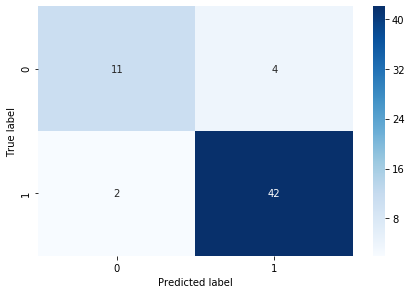

In [79]:
sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Regularization avoid overfitting by adding shrinkage penalty parameter.

# 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rf_classifier = RandomForestClassifier(n_estimators=43,criterion='entropy')

In [148]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=43,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [149]:
y_pred_rf = rf_classifier.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



In [150]:
print("Accuracy Score {}".format(accuracy_score(y_test, y_pred_rf)))

Accuracy Score 0.9322033898305084


In [151]:
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix:")
conf_mat_rf

Confusion matrix:


array([[12,  3],
       [ 1, 43]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

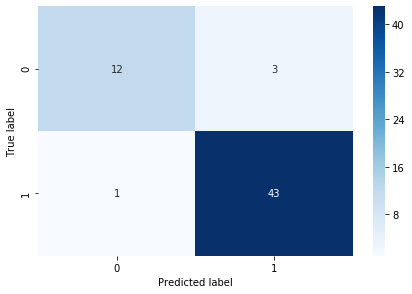

In [152]:
sns.heatmap(conf_mat_rf,cmap = 'Blues', annot=True,fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Use GridSearch for finding optimal number of trees

In [154]:
n_estimators = [x for x in range(1, 500)]

In [155]:
rf_gridSearch = RandomForestClassifier()

In [156]:
from sklearn.model_selection import RandomizedSearchCV

In [157]:
random_grid = {'n_estimators': n_estimators}

In [158]:
rf_random = RandomizedSearchCV(estimator=rf_gridSearch, param_distributions=random_grid, 
                               cv = 3, random_state=42, n_iter = 100, n_jobs = -1)

In [159]:
rf_random.fit(x_train, y_train)

C:\Users\Chandan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [160]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=74,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [161]:
y_pred_gs = rf_random.predict(x_test)
print(classification_report(y_test,y_pred_gs))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        44

    accuracy                           0.95        59
   macro avg       0.97      0.90      0.93        59
weighted avg       0.95      0.95      0.95        59



In [162]:
print("Accuracy Score {}".format(accuracy_score(y_test, y_pred_gs)))

Accuracy Score 0.9491525423728814


In [163]:
conf_mat_gs = confusion_matrix(y_test, y_pred_gs)

In [167]:
print("Confusion matrix:")
conf_mat_gs

Confusion matrix:


array([[12,  3],
       [ 0, 44]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

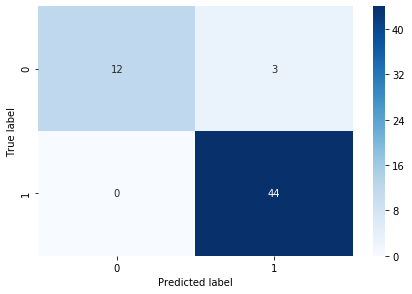

In [168]:
sns.heatmap(conf_mat_gs,cmap = 'Blues', annot=True,fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')